### Glass Identification Dataset
* Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



* The chemical compositions are measured as the weight percent in corresponding oxide.

#### Attribute Information-

 * Id number: 1 to 214
 * RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
*  Type of glass: (class attribute)

### The Target label, Type of Glass has 7 classes:
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

* There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


* Predict : Type of glass

In [ ]:
'Id number','RI','Na','Mg','Al','Si','K','Ba','Fe','Type of glass'

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import mode

In [39]:
data = pd.read_csv('glass.csv', names = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

In [40]:
data

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [72]:
data.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Univariate and Bivariate Analyses

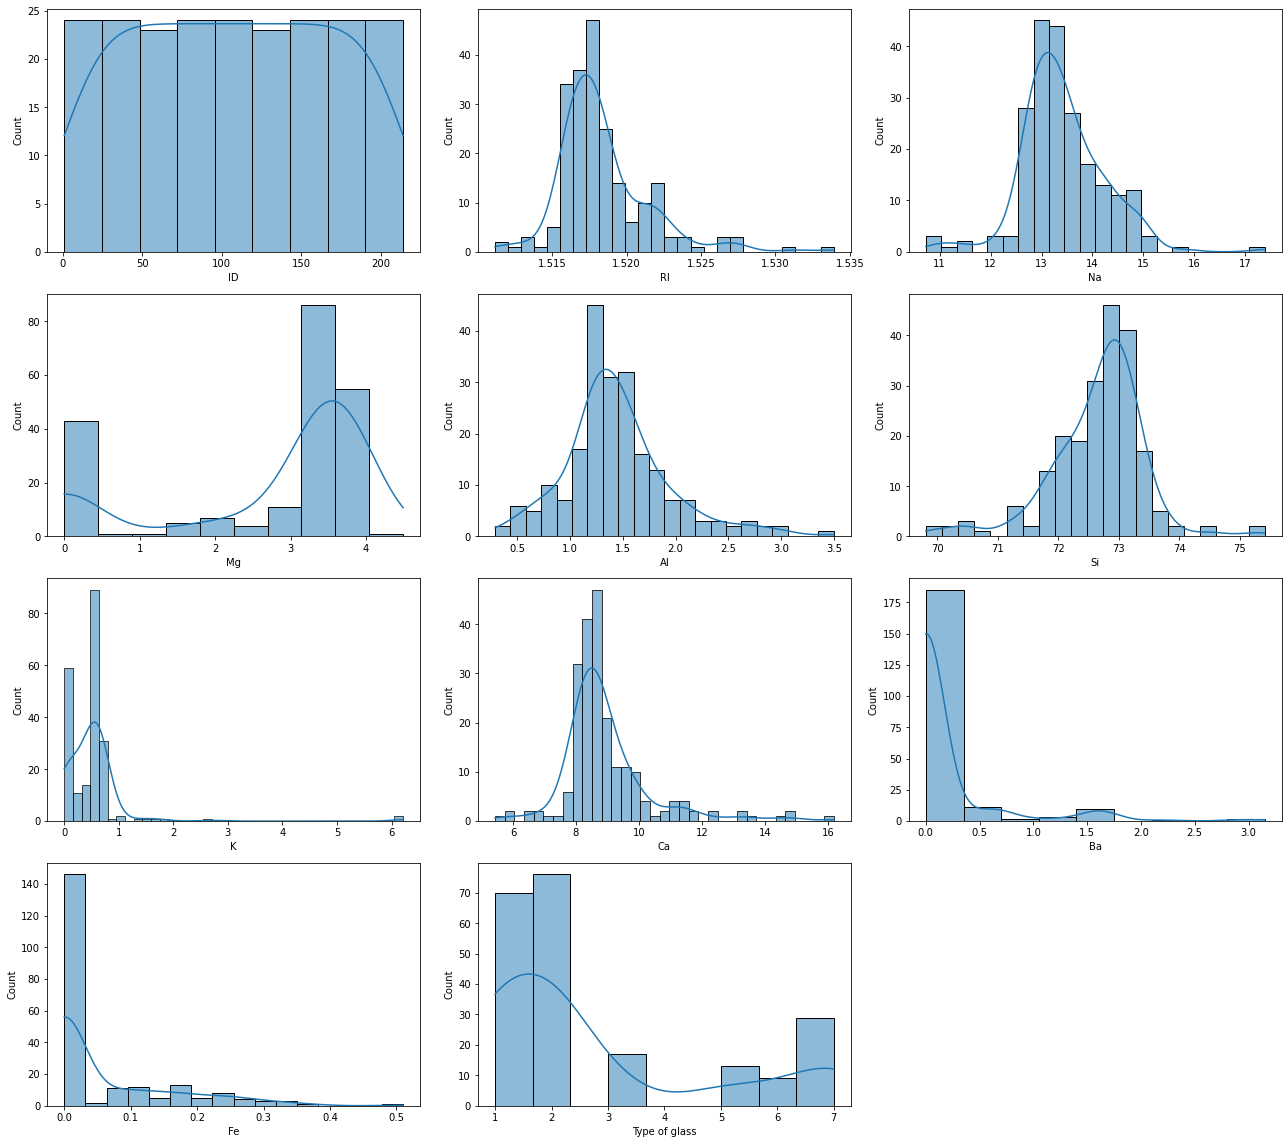

In [50]:
cols = 3                                                         #we can see the frequency ditribution here
rows = 4
fig = plt.figure( figsize=(cols*6, rows*4))
for i, col in enumerate(data):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax, kde = True)
    
fig.tight_layout()  
plt.show()

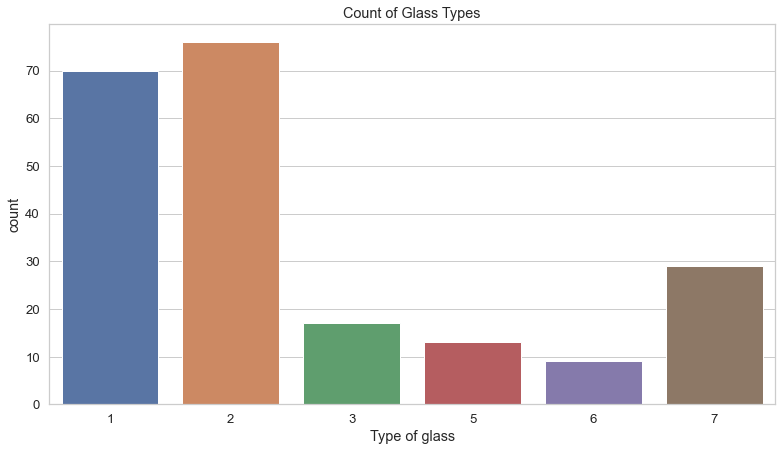

In [61]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (13,7))
sns.countplot('Type of glass',data=data).set_title('Count of Glass Types')
plt.show()

### 
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps
* We see that Type 2 and 1 have the highest occurences in the dataset, The dataset source is forensic sciences department and probably the reason of the high count of type 1 & 2 is that many criminals break through building window glasses at the scene rather than breaking containers or tableware.

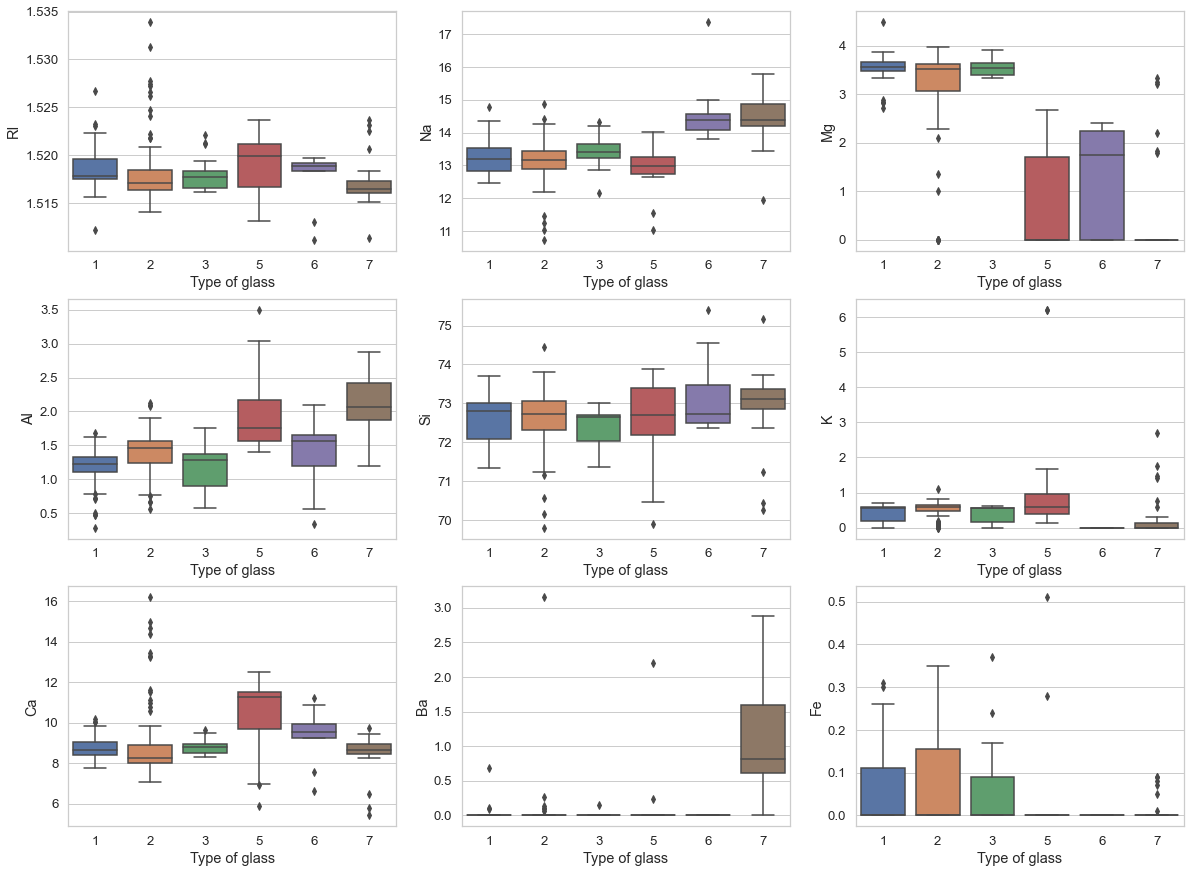

In [89]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type of glass', y='RI', data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Type of glass', y='Na', data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Type of glass', y='Mg', data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Type of glass', y='Al', data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Type of glass', y='Si', data=data)
plt.subplot(3,3,6)
sns.boxplot(x='Type of glass', y='K', data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Type of glass', y='Ca', data=data)
plt.subplot(3,3,8)
sns.boxplot(x='Type of glass', y='Ba', data=data)
plt.subplot(3,3,9)
sns.boxplot(x='Type of glass', y='Fe', data=data)
plt.show()

### 
* The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. This is because Iron is added mainly in colored glasses.


### let's see the relationship between each one of them through a pairplot. (We will leave out K, Ba and Fe due to sparse concentration)

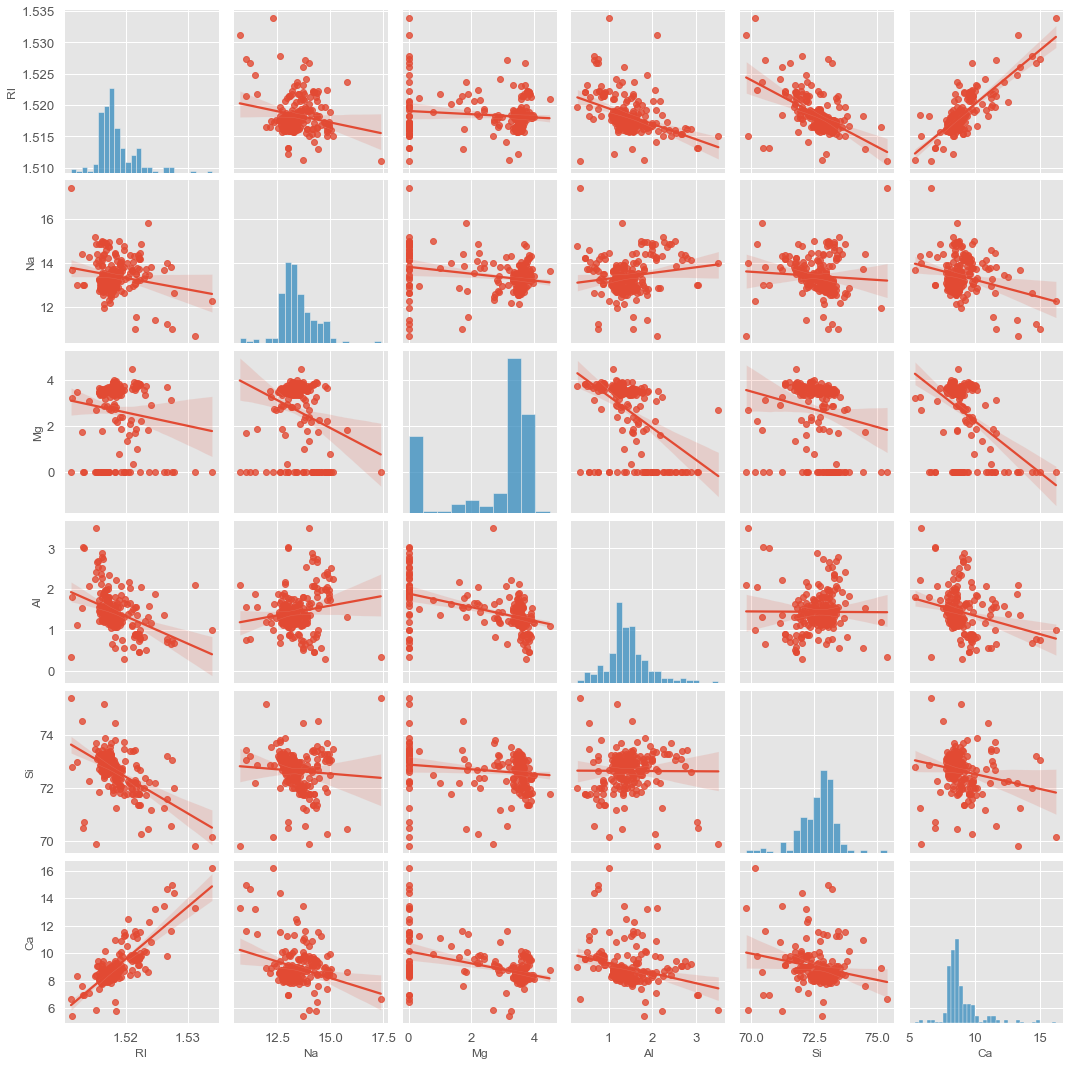

In [88]:
sns.pairplot(data[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

### 
* On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

* Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on some of the properties.

In [91]:
data.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

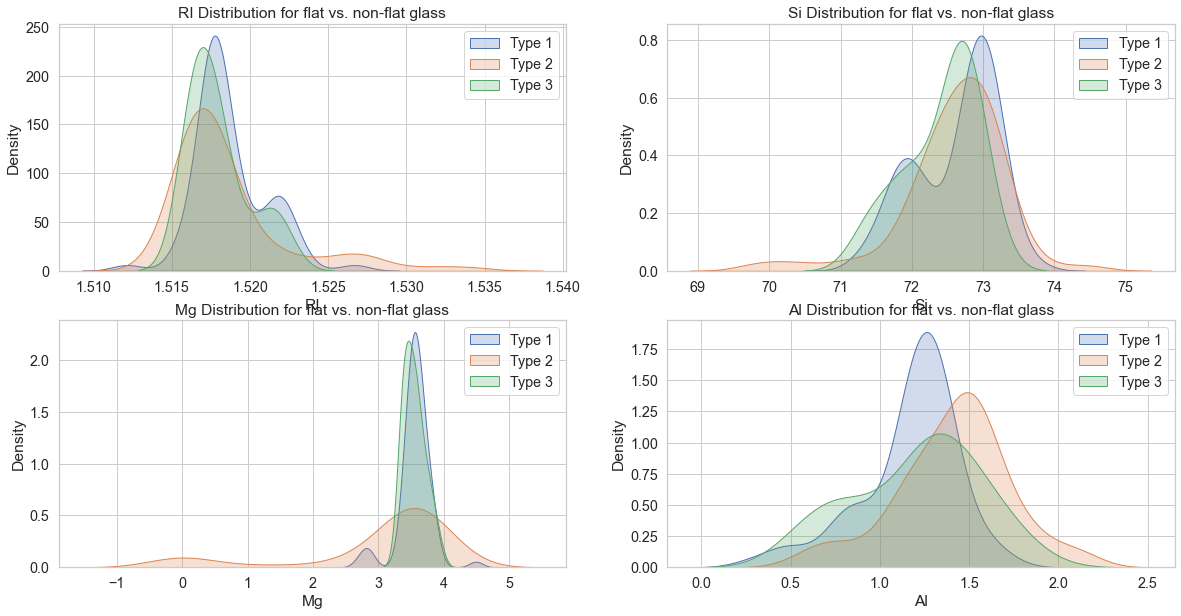

In [93]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(data["RI"][data['Type of glass'] == 1], shade = True)
sns.kdeplot(data["RI"][data['Type of glass'] == 2], shade = True)
sns.kdeplot(data["RI"][data['Type of glass'] == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(data["Si"][data['Type of glass'] == 1], shade = True)
sns.kdeplot(data["Si"][data['Type of glass'] == 2], shade = True)
sns.kdeplot(data["Si"][data['Type of glass'] == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(data["Mg"][data['Type of glass'] == 1], shade = True)
sns.kdeplot(data["Mg"][data['Type of glass'] == 2], shade = True)
sns.kdeplot(data["Mg"][data['Type of glass'] == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(data["Al"][data['Type of glass'] == 1], shade = True)
sns.kdeplot(data["Al"][data['Type of glass'] == 2], shade = True)
sns.kdeplot(data["Al"][data['Type of glass'] == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.show()

### 
* Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. The non-float glass, type 2 has many extreme points which make its range very high.

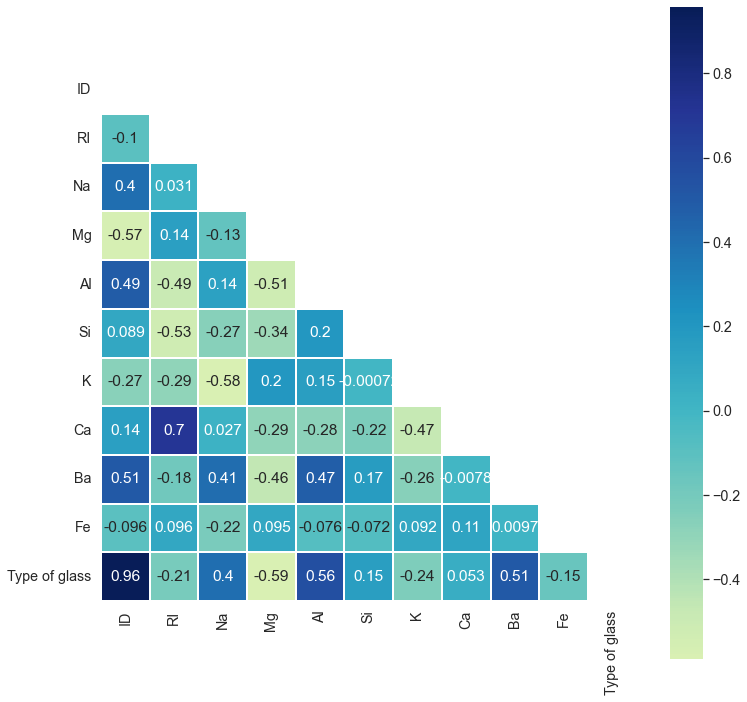

In [96]:
plt.figure(figsize = (12,12))
#features = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']

corr_matrix = data.corr('spearman')
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'YlGnBu', 
            mask = np.triu(np.ones_like(corr_matrix, dtype = bool)),  
            center = 0,
            square = True, 
            linewidths = 0.1 )
plt.show()

### 
* As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels.

* Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

### let's see the outliers

BoxPlots of the features:


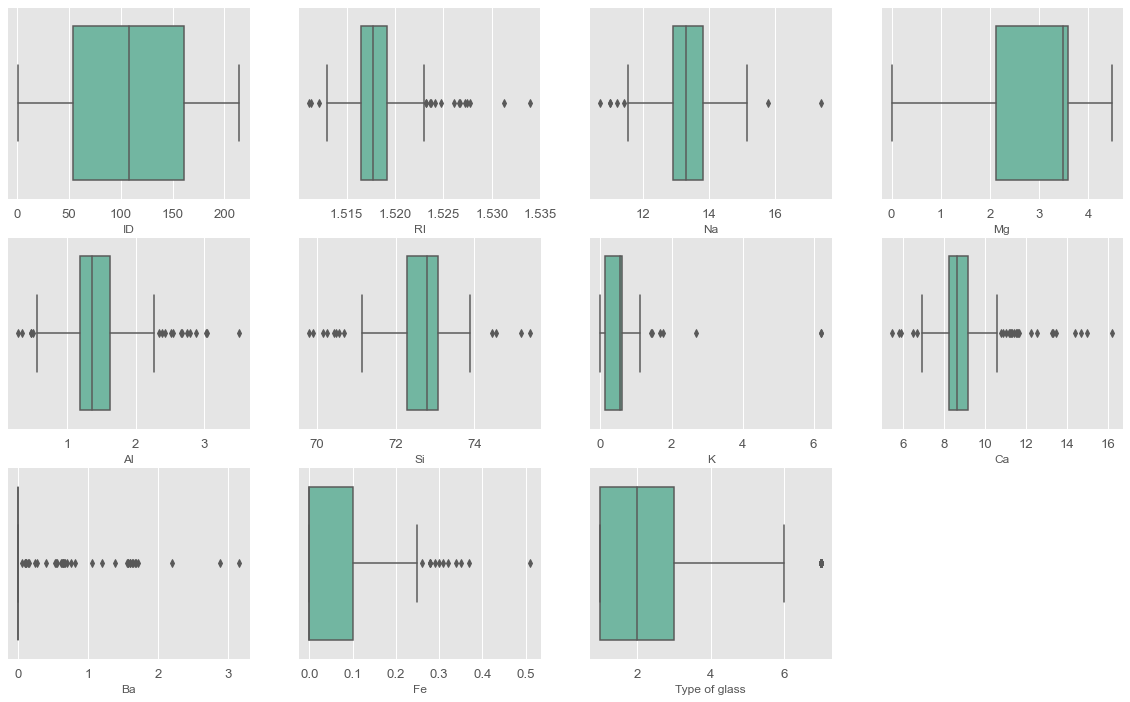

In [86]:
plt.style.use('ggplot')
clist = data.columns
plt.figure(figsize = (20,12))
for i in range(0, len(clist)):
    plt.subplot(3,4, i+1)
    sns.boxplot(data[clist[i]], palette="Set2")
print("BoxPlots of the features:")
plt.show()

* We can see the outliers in calcium  and barium but as the dataset is samll and we can loose some inforamtion so first we see the modeling without removing any outliers

In [99]:
df = data.copy()

In [104]:
df.drop(['ID'], axis = 1, inplace = True)

### Modeling

In [106]:
x=data.drop(['Type of glass'],axis=1)
y=data['Type of glass']

In [107]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.004695,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.009390,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.014085,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.018779,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
209,0.981221,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.985915,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.990610,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.995305,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 78.46153846153847
Accuracy Score of Logistic Regression model in test is  75.16778523489933
...........

Accuracy Score of Decision Tree Classifier model in test is 98.46153846153847
Accuracy Score of Decision Tree Classifier model in train is 100.0
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 86.15384615384616
Accuracy Score of K-Nearest Neighbour Classifier model in train is 90.60402684563759
.............

Accuracy Score of Gradient Boosting Classifier model in test is 95.38461538461539
Accuracy Score of Gradient Boosting Classifier model in train is 100.0
.............

Accuracy Score of Random Forest model in test is 96.92307692307692
Accuracy Score of Random Forest model in train is 100.0
.............

Accuracy Score of MultinomialNB model in test is 75.38461538461539
Accuracy Score of MultinomialNB model in train is 71.81208053691275
.............

Accuracy Score of ADA Boost model in tes

In [109]:
print("Accuracy Score of Gradient Boosting Classifier model is", accuracy_score(y_test, pred_gbc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_gbc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_gbc))

Accuracy Score of Gradient Boosting Classifier model is 95.38461538461539
Confusion matrix for RFC Model is
[[23  0  0  0  0  0]
 [ 0 26  0  0  0  0]
 [ 0  0  3  0  1  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.93      1.00      0.96        26
           3       1.00      0.75      0.86         4
           5       1.00      0.33      0.50         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.95        65
   macro avg       0.93      0.85      0.85        65
weighted avg       0.96      0.95      0.95        65



### Let's see cross validation in decision tree classifier

In [110]:
scores = cross_val_score(dtc, x, y, cv=5)

In [111]:
scores

array([0.6744186 , 1.        , 1.        , 1.        , 0.54761905])

In [112]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.1947


In [113]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

In [114]:
x_new, y_new = smk.fit_resample(x,y)

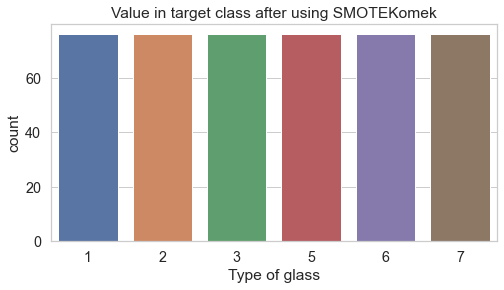

In [115]:
plt.figure(figsize = (8, 4))
plt.title('Value in target class after using SMOTEKomek')
sns.countplot(x = y_new)
plt.show()

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3)

In [119]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 84.67153284671532
Accuracy Score of Logistic Regression model in test is  86.20689655172413
...........

Accuracy Score of Decision Tree Classifier model in test is 99.27007299270073
Accuracy Score of Decision Tree Classifier model in train is 100.0
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 91.24087591240875
Accuracy Score of K-Nearest Neighbour Classifier model in train is 96.23824451410658
.............

Accuracy Score of Gradient Boosting Classifier model in test is 98.54014598540147
Accuracy Score of Gradient Boosting Classifier model in train is 100.0
.............

Accuracy Score of Random Forest model in test is 100.0
Accuracy Score of Random Forest model in train is 100.0
.............

Accuracy Score of MultinomialNB model in test is 64.23357664233576
Accuracy Score of MultinomialNB model in train is 75.86206896551724
.............

Accuracy Score of ADA Boost model in test is 43.0656

In [120]:
scores = cross_val_score(dtc, x, y, cv=5)

In [121]:
scores 

array([0.69767442, 1.        , 1.        , 1.        , 0.54761905])

In [122]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.1909


In [123]:
scores_1 = cross_val_score(lg, x, y, cv=5)

In [124]:
scores_1

array([0.41860465, 0.81395349, 0.55813953, 0.79069767, 0.78571429])

In [125]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores_1.mean(), scores_1.std()))

0.67 accuracy with a standard deviation of 0.1577


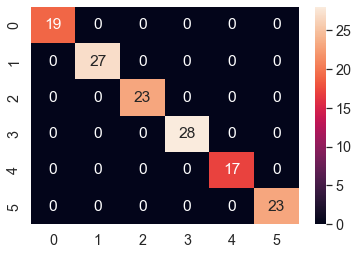

In [126]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred_rfc)
f = sns.heatmap(cm, annot=True, fmt='d')

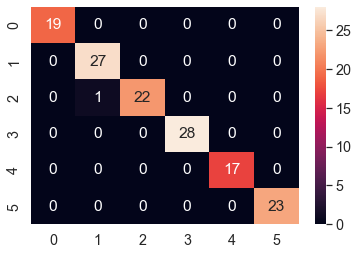

In [132]:
cm = confusion_matrix(y_test,pred_dtc)
f = sns.heatmap(cm, annot=True, fmt='d')

In [155]:
import pickle

Pkl_Filename = "Glass_random_Forest.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(pred_rfc, file)